# Social Media Analytics Spring 2018 - Assignment #1

## Matt Barrett, Tim Lai, Christine Mulcahy, Elena Reynolds, and Brett Scroggins

## Part I: Find predictors of influence

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### Variable correlations

In [3]:
corr_df = train.corr()
corr_df

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
Choice,1.000000,0.134133,0.063678,0.135078,0.020745,0.024139,0.123868,0.137833,0.107648,0.065543,...,-0.042859,-0.191179,-0.062332,-0.064774,-0.139521,-0.168341,-0.102028,-0.108259,-0.051364,-0.069339
A_follower_count,0.134133,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,...,0.033327,0.140186,0.029233,0.030709,-0.011715,-0.010649,-0.013452,0.051651,-0.033974,-0.014107
A_following_count,0.063678,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,...,-0.010944,-0.011792,0.001077,-0.001774,0.006797,0.002244,-0.000280,-0.002475,0.003415,-0.003968
A_listed_count,0.135078,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,...,0.048962,0.203068,0.045555,0.045333,-0.002835,0.006040,0.003535,0.068414,-0.034576,-0.010478
A_mentions_received,0.020745,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,...,0.023431,0.136128,0.010900,0.008098,-0.008721,-0.012288,-0.011123,0.023156,-0.017576,-0.011153
A_retweets_received,0.024139,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,...,0.023340,0.139695,0.011525,0.008719,-0.007203,-0.012692,-0.009671,0.023931,-0.017675,-0.012855
A_mentions_sent,0.123868,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,...,0.027851,0.005401,0.006467,0.010684,0.016772,0.003553,0.019061,0.005172,0.016377,0.014035
A_retweets_sent,0.137833,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,...,0.016303,0.038314,0.057745,0.060162,0.029084,0.011914,0.039341,0.050733,-0.004573,0.005986
A_posts,0.107648,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,...,0.021679,-0.005321,0.001848,0.005974,0.028039,0.002118,0.023880,-0.001924,0.010813,0.004692
A_network_feature_1,0.065543,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,...,0.034620,0.127232,0.012452,0.011003,-0.002757,-0.012546,-0.010237,0.026392,-0.023533,-0.015348


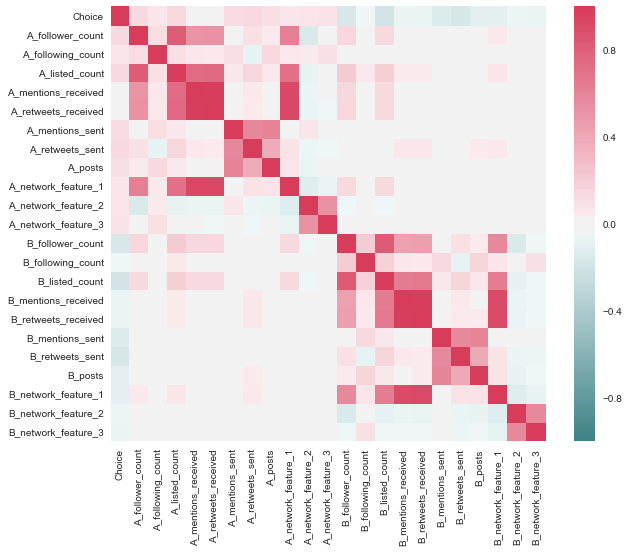

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_df, mask=np.zeros_like(corr_df, dtype=np.bool), cmap=sns.diverging_palette(200, 5, as_cmap=True),
            square=True, ax=ax)

### Remove highly correlated variables (to try in models)

In [5]:
new_train = train[train.columns.difference(['A_mentions_received','A_network_feature_1','A_listed_count','B_mentions_received','B_network_feature_1', 'B_listed_count'])]
cols = new_train.columns.tolist()
cols = cols[-1:] + cols[:-1]
new_train = new_train[cols]
new_train.head()

,Choice,A_follower_count,A_following_count,A_mentions_sent,A_network_feature_2,A_network_feature_3,A_posts,A_retweets_received,A_retweets_sent,B_follower_count,B_following_count,B_mentions_sent,B_network_feature_2,B_network_feature_3,B_posts,B_retweets_received,B_retweets_sent
0,0,228,302,0.100503,166.500000,11355.000000,0.362150,0.100503,0.100503,34463,29808,8.204331,75.530303,1916.893939,6.988815,3.984029,0.332423
1,0,21591,1179,5.709329,18.442971,1330.366048,5.176620,25.798292,1.111159,39262,848,3.227677,132.030675,2931.515337,1.070321,8.943607,0.564343
2,0,7310,1215,5.361519,68.927835,5999.896907,3.589718,9.556347,0.591206,3622,482,0.603202,10.333333,277.333333,0.603202,0.354379,0.100503
3,0,20,7,1.331508,2.000000,96.166667,2.830627,0.277306,0.100503,19562,17637,27.552040,23.469296,1395.845634,32.101906,390.293681,7.167557
4,1,45589,862,27.881768,127.404293,2833.847943,23.861282,36.998884,3.333492,7554,1711,6.764657,48.500000,1993.627907,4.563246,3.581661,1.119727


###  Transform the data to be utilized in models

#### Below is the transformed data for A-B

In [6]:
train_amb = deepcopy(train)

train_amb_df = pd.DataFrame(train_amb)

for i in range(1,12):
    train_amb_df.iloc[:,i] = train_amb_df.iloc[:,i] - train_amb_df.iloc[:,i+11]

train_amb_df.columns = [str(x) + '_diff' for x in train_amb_df.columns]
train_amb_df = train_amb_df[train_amb_df.columns[0:12]]
train_amb_df.head()

,Choice_diff,A_follower_count_diff,A_following_count_diff,A_listed_count_diff,A_mentions_received_diff,A_retweets_received_diff,A_mentions_sent_diff,A_retweets_sent_diff,A_posts_diff,A_network_feature_1_diff,A_network_feature_2_diff,A_network_feature_3_diff
0,0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,0,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


### Train/test split

In [7]:
y = train_amb_df["Choice_diff"]
X = train_amb_df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression

In [8]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)
LR_cm = confusion_matrix(y_test, LR_pred)
LR_accuracy = accuracy_score(y_test, LR_pred)

print "Confusion matrix:\n", LR_cm
print "\nMean Accuracy Score:\n", LR_accuracy

Confusion matrix:
[[664 232]
 [229 690]]

Mean Accuracy Score:
0.746005509642


### Random Forest

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_predicted)
rf_accuracy = accuracy_score(y_test, rf_predicted)

print "Confusion matrix:\n", rf_cm
print "\nMean Accuracy Score:\n", rf_accuracy

Confusion matrix:
[[694 202]
 [247 672]]

Mean Accuracy Score:
0.75261707989


### Adaboost

In [10]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
predicted_adb = adb.predict(X_test)
cm_adb = confusion_matrix(y_test, predicted_adb)
accuracy_adb = accuracy_score(y_test, predicted_adb)

print "Confusion matrix:\n", cm_adb
print "\nMean Accuracy Score:\n", accuracy_adb

Confusion matrix:
[[667 229]
 [199 720]]

Mean Accuracy Score:
0.764187327824


### Feature importance from best model (Adaboost)

In [11]:
importances = adb.feature_importances_
importances
#A_follower_count_diff, A_listed_count_diff,A_retweets_received_diff

array([ 0.14,  0.04,  0.24,  0.08,  0.12,  0.12,  0.06,  0.06,  0.02,
        0.06,  0.06])

## Profit Calculations

In [12]:
#Pre-analytics
def calc_profit(C,A,B):
    if(C) == 1:
        ROI = 0.0005*10*A
    else:
        ROI = 0.0005*10*B
    return -10+ROI

train["Profit_no_analytics"] =  train.apply(lambda x: calc_profit(x["Choice"],x["A_follower_count"],x["B_follower_count"]),axis = 1)

#Post-analytics
def calc_analytics_profit(C,p,A,B):
    if C == 1 and p == 1: 
        ROI = 0.00075*10*A
    elif C == 0 and p == 0: 
        ROI = 0.00075*10*B
    else: 
        ROI = 0
    return -10 + ROI

y_pred = adb.predict(X)
train['pred'] = pd.DataFrame(y_pred)
train["Profit_with_analytics"] = train.apply(lambda x: calc_analytics_profit(x["Choice"], x["pred"],x["A_follower_count"],x["B_follower_count"]),axis = 1)

#Post-analytics with perfect predictions
def perfect_profit(C,A,B):
    if C == 1:
        ROI = 0.00075*10*A
    else:
        ROI = 0.00075*10*B
    return -10 + ROI

train['Profit_perfect'] = train.apply(lambda x: perfect_profit(x["Choice"],x["A_follower_count"],x["B_follower_count"]),axis = 1)

In [13]:
profit_no_analytics = train["Profit_no_analytics"].sum()
profit_with_analytics = train['Profit_with_analytics'].sum()
profit_perfect_analytics = train['Profit_perfect'].sum()

#Compare pre-analytics with imperfect
value1 = profit_with_analytics - profit_no_analytics
lift1 = float(profit_with_analytics/profit_no_analytics)
print "Financial value of model is ${0:,.2f}\n".format(value1)
print "Lift in profit (analytics vs. no analytics): {0:.3f}".format(lift1)   

Financial value of model is $10,578,969.88

Lift in profit (analytics vs. no analytics): 1.394


In [14]:
#Compare pre-analytics with perfect
value2 = profit_perfect_analytics - profit_no_analytics
lift2 = float(profit_perfect_analytics/profit_no_analytics)
print "Financial value of perfect model is ${0:,.2f}\n".format(value2)
print "Lift in profit (perfect analytics vs. no analytics): {0:.3f}".format(lift2)

Financial value of perfect model is $13,441,421.48

Lift in profit (perfect analytics vs. no analytics): 1.501
